In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
iris = datasets.load_iris()#iris returned is of the type bunch 
print(iris['feature_names'])#prints the feature name





x = iris.data[:,2]# this is done so that only two features are considered to make the calculations easier
print(x)
y = (iris.target != 0)*1 # iris # iris.target outputd sn sttsy of true if target no equal to zero and 1 if target is zero 
#multiplting this array with one will output an array of 1s and 0s 1 if output is not zero and zero if output is zero
type(x)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1]


numpy.ndarray

In [2]:
#to convert the bunch object to dataframe you can use the following method

iri = pd.DataFrame(iris.data, columns = iris.feature_names)#creates a dataframe 
#for all the iris dataset, columns add the columns to the dataset
iri['target'] = y#adds a new target column to the dataframe 'ArithmeticError
print(iri)
X = iri.iloc[:,0:2]
Y = iri['target']

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

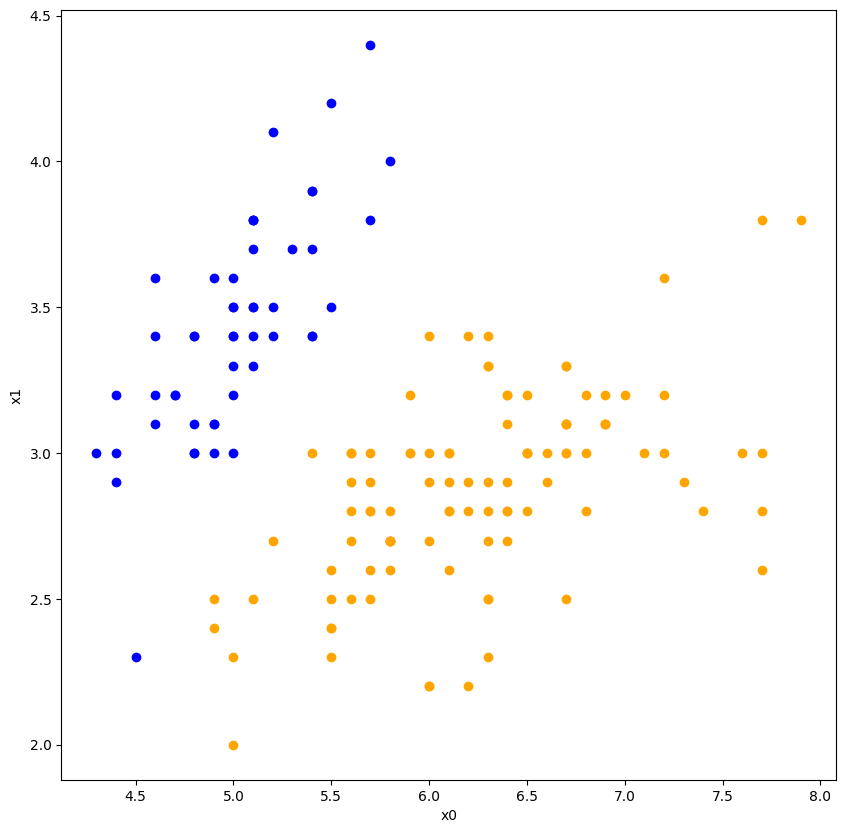

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1 ,1 , figsize = (10,10))
ax.set_xlabel('x0')
ax.set_ylabel('x1')
for index, element in enumerate(Y): #returns an iterator 
    if element==1:
        ax.scatter(X.iloc[index,0],X.iloc[index,1], marker = 'o', c ='orange')
    else:
        ax.scatter(X.iloc[index,0],X.iloc[index,1], marker = 'o', c = 'b')
plt.show()

In [4]:
def sigmoid(z):
    """sigmoid is a function that computes the sigmoid function
    input: ndarray for which sigmoid is calculated
    output: ndarray"""
    k = pow(1 + np.exp(-z),-1)
    return k

In [5]:
def cost_function(y,y_hat):
    """input is the predicted y value y_hat, and actual target, y
        output is the cost function"""
        
    cost = (-y * np.log(y_hat) + (1-y) * np.log(1-y_hat)).mean()
    
    return cost
     

In [6]:
#gradient = np.dot(x, (y-y_hat))
class LRegression:
    def __init__(self, lr=0.01, num_iter=100000,verbose=False, fit_intercept=True ):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):#adding an intercept term to the data
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) 
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            verbose = self.verbose
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if( verbose == True and i % 10000 == 0):#verbose determines if the output will  be printed or not
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [7]:
model = LRegression(lr=0.1, num_iter=300000)
%time model.fit(X, Y)

CPU times: total: 17.7 s
Wall time: 19.3 s


In [8]:
preds = model.predict(X, threshold = 0.5)
# accuracy
(preds == Y).mean()


1.0

In [9]:
model.theta

array([-25.89066442,  12.523156  , -13.40150447])

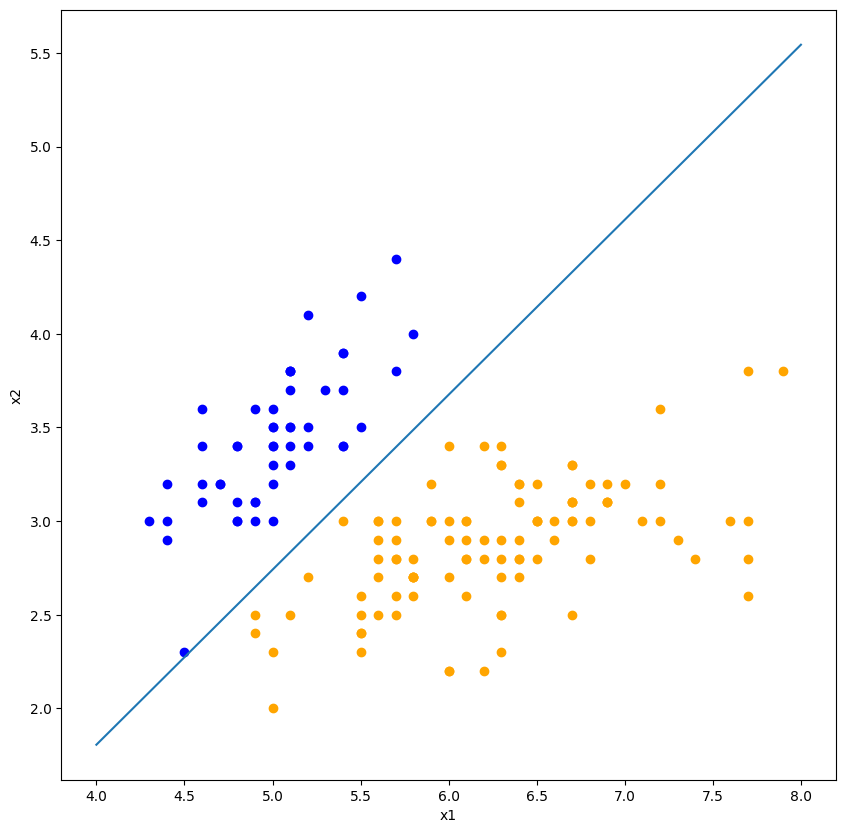

In [10]:
x1 = np.array([4,5,6,7,8])

x2 = -(model.theta[0] + model.theta[1]*x1)/model.theta[2]
fig, ax = plt.subplots(1 ,1 , figsize = (10,10))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
for index, element in enumerate(Y): #returns an iterator 
    if element==1:
        ax.scatter(X.iloc[index,0],X.iloc[index,1], marker = 'o', c ='orange')
    else:
        ax.scatter(X.iloc[index,0],X.iloc[index,1], marker = 'o', c = 'b')
plt.plot(x1,x2)
plt.show()



C:\Users\viphe\AppData\Local\Temp\ipykernel_16416\2371929410.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Text(0, 0.5, 'y')

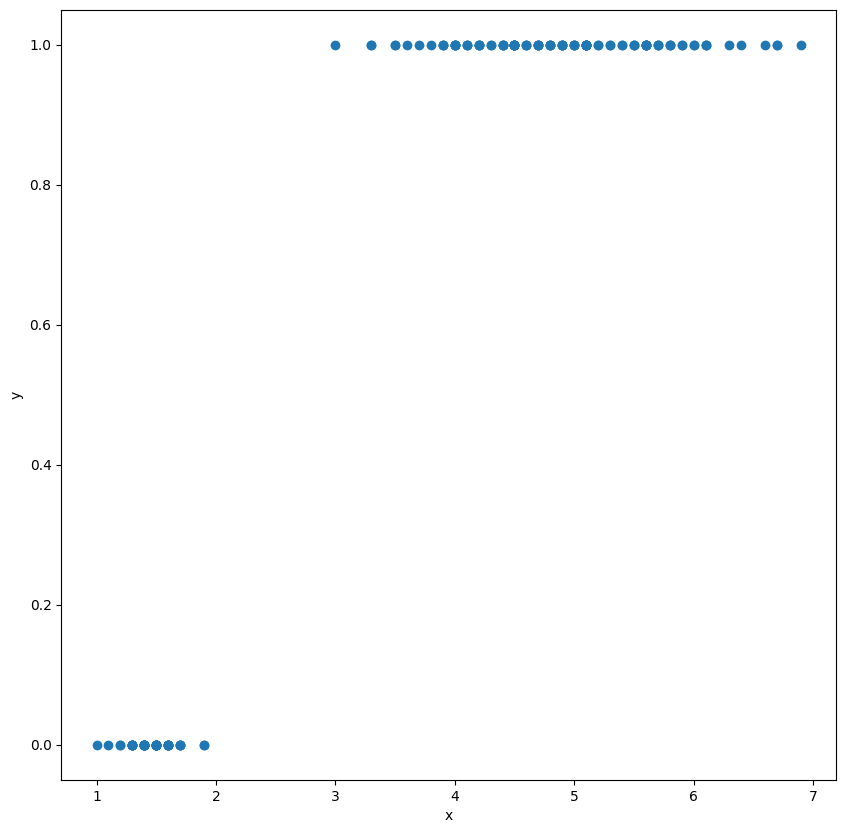

In [12]:
x_ = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_ = np.array([0, 0, 0, 1, 1, 1])
fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.scatter(x,y)
fig.show()
ax.set_xlabel("x")
ax.set_ylabel("y")

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_,y_,test_size=0.2)
lr = LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [19]:
y_pred = lr.predict(x_test)
print("accuracy",lr.score(x_test,y_pred))#these method first makes prediction then checks the accuracy

accuracy 1.0
